In [108]:
import requests
import json
import csv
import pandas as pd

from matplotlib import pyplot as plt
import numpy as np
import time

new_csv = open("forecast.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(new_csv)
csv_writer.writerow(["Day","Temperature","Description"])


lat = "42.0987"
lon = "-75.9125"
forecast = json_file["properties"]["forecast"]
x = requests.get(forecast)
json = x.json()

genius = requests.get(f"https://api.weather.gov/points/{42.0987},{-75.9130}")

json_file = genius.json()
a = json["properties"]["periods"]
for i in a:
    
    day = i["name"]
    temp = i["temperature"]
    description = i["detailedForecast"]
    
    csv_writer.writerow([day, temp, description])
    
new_csv.close()

panda = pd.read_csv("forecast.csv")
panda

,Day,Temperature,Description
0,Tonight,30,A slight chance of snow showers after 5am. Par...
1,Tuesday,55,A slight chance of snow showers before 7am. Mo...
2,Tuesday Night,33,"Mostly cloudy, with a low around 33. Southeast..."
3,Wednesday,56,A slight chance of rain showers after 2pm. Mos...
4,Wednesday Night,44,"A chance of rain showers. Mostly cloudy, with ..."
5,Thursday,60,"Rain showers likely. Cloudy, with a high near ..."
6,Thursday Night,38,"Rain showers likely. Cloudy, with a low around..."
7,Friday,47,"A chance of rain showers. Cloudy, with a high ..."
8,Friday Night,34,"A chance of rain before 1am, then a chance of ..."
9,Saturday,44,"Rain and snow likely. Mostly cloudy, with a hi..."


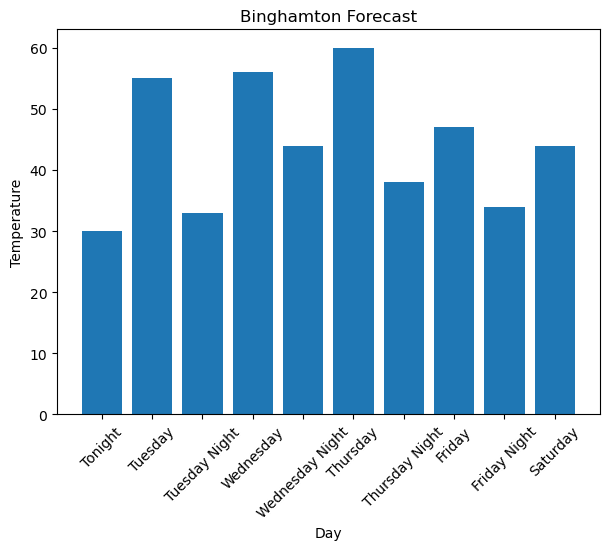

In [89]:
df = pd.DataFrame(panda)

day = df["Day"]
temp = df["Temperature"]

fig = plt.figure(figsize = (7,5))
plt.bar(day[0:10], temp[0:10])

plt.xlabel("Day")
plt.ylabel("Temperature")
plt.title("Binghamton Forecast")

plt.xticks(rotation=45)

plt.show()

In [103]:
countryinfo = requests.get("https://date.nager.at/api/v3/CountryInfo/US")
b = countryinfo.json()
b

{'commonName': 'United States',
 'officialName': 'United States of America',
 'countryCode': 'US',
 'region': 'Americas',
 'borders': [{'commonName': 'Canada',
   'officialName': 'Canada',
   'countryCode': 'CA',
   'region': 'Americas',
   'borders': None},
  {'commonName': 'Mexico',
   'officialName': 'United Mexican States',
   'countryCode': 'MX',
   'region': 'Americas',
   'borders': None}]}

In [110]:
data = open("countrycode.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(data)
csv_writer.writerow(["Country Code", "Name"])

countries = requests.get("https://date.nager.at/api/v3/AvailableCountries")
j = countries.json()

count = 0
for x in j:

    country = j[count]["countryCode"]
    name = j[count]["name"]
    count+=1
   
    csv_writer.writerow([country, name])

    
data.close()


sheet = pd.read_csv("countrycode.csv")
sheet

,Country Code,Name
0,AD,Andorra
1,AL,Albania
2,AR,Argentina
3,AT,Austria
4,AU,Australia
...,...,...
105,VA,Vatican City
106,VE,Venezuela
107,VN,Vietnam
108,ZA,South Africa


In [111]:
weekend = requests.get("https://date.nager.at/api/v3/LongWeekend/2000/US")
a2 = weekend.json()
a2

[{'startDate': '1999-12-31',
  'endDate': '2000-01-02',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-01-15',
  'endDate': '2000-01-17',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-02-19',
  'endDate': '2000-02-21',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-05-27',
  'endDate': '2000-05-29',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-07-01',
  'endDate': '2000-07-04',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2000-09-02',
  'endDate': '2000-09-04',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-11-10',
  'endDate': '2000-11-12',
  'dayCount': 3,
  'needBridgeDay': False},
 {'startDate': '2000-11-23',
  'endDate': '2000-11-26',
  'dayCount': 4,
  'needBridgeDay': True},
 {'startDate': '2000-12-23',
  'endDate': '2000-12-25',
  'dayCount': 3,
  'needBridgeDay': False}]

In [112]:
AL = requests.get("https://date.nager.at/api/v3/PublicHolidays/2022/AL")
c = AL.json()
c

[{'date': '2022-01-03',
  'localName': 'Viti i Ri',
  'name': "New Year's Day",
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-01-03',
  'localName': 'Viti i Ri',
  'name': "New Year's Day",
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-14',
  'localName': 'Dita e Verës',
  'name': 'Summer Day',
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-03-22',
  'localName': 'Dita e Sulltan Nevruzit',
  'name': 'Nowruz',
  'countryCode': 'AL',
  'fixed': True,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2022-04-17',
  'localName': 'Pashkët Katolike',
  'name': 'Easter Sunday',
  'countryCode': 'AL',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear'

In [113]:
today = requests.get("https://date.nager.at/api/v3/IsTodayPublicHoliday/US?offset=0")
t = today
t

<Response [204]>

In [114]:
next_ = requests.get("https://date.nager.at/api/v3/NextPublicHolidays/US")
n = next_.json()
n

[{'date': '2023-04-07',
  'localName': 'Good Friday',
  'name': 'Good Friday',
  'countryCode': 'US',
  'fixed': False,
  'global': False,
  'counties': ['US-CT',
   'US-DE',
   'US-HI',
   'US-IN',
   'US-KY',
   'US-LA',
   'US-NC',
   'US-ND',
   'US-NJ',
   'US-TN'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-05-29',
  'localName': 'Memorial Day',
  'name': 'Memorial Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-06-19',
  'localName': 'Juneteenth',
  'name': 'Juneteenth',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': 2021,
  'types': ['Public']},
 {'date': '2023-07-04',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'US',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-09-04',
  'localName': 'Labor Day',
  'name'

In [115]:
response = requests.get("https://date.nager.at/api/v3/NextPublicHolidaysWorldwide")
r = response.json()
r

[{'date': '2023-03-20',
  'localName': 'Día de San José',
  'name': "Saint Joseph's Day",
  'countryCode': 'CO',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'San José',
  'name': "St. Joseph's Day",
  'countryCode': 'ES',
  'fixed': True,
  'global': False,
  'counties': ['ES-MD'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Natalicio de Benito Juárez',
  'name': "Benito Juárez's birthday",
  'countryCode': 'MX',
  'fixed': False,
  'global': True,
  'counties': None,
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Otago Anniversary Day',
  'name': 'Otago Anniversary Day',
  'countryCode': 'NZ',
  'fixed': False,
  'global': False,
  'counties': ['NZ-OTA'],
  'launchYear': None,
  'types': ['Public']},
 {'date': '2023-03-20',
  'localName': 'Independence Day',
  'name': 'Independence Day',
  'countryCode': 'TN',

In [118]:
file = open("holidays.csv", "w", newline="", encoding="utf-8")
csv_writer = csv.writer(file)
csv_writer.writerow(["Country Code", "Num of Holidays"])


country_code_list = ["US", "AL", "AU", "PL", "GB", "AR", "CA",
                     "JP", "CL", "DE"]

for x in country_code_list:    
        response1 = requests.get(f"https://date.nager.at/api/v3/PublicHolidays/2020/{x}")
        r1 = response1.json()
        count_num = len(r1)
        code = x
        csv_writer.writerow([code, count_num])

file.close()

   
sheet = pd.read_csv("holidays.csv")
sheets = sheet.sort_values(by="Num of Holidays", ascending=False)
sheets  

,Country Code,Num of Holidays
6,CA,30
2,AU,21
9,DE,20
5,AR,16
7,JP,16
8,CL,16
1,AL,14
3,PL,13
4,GB,13
0,US,12
